# 🏢 Inventory Data Analysis

**Project Objective:**  
Analyze inventory data to optimize stock levels, reduce carrying costs, avoid stockouts, and improve inventory efficiency.

**Datasets Used:**  
- Beg_Inv.csv  
- End_Inv.csv  
- Final_Purchase.csv  
- Final_Sales.csv  
- Invoice.csv  
- Purchase_Price.csv

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

### Step 2: Load Raw Data

In [3]:
CLEAN_PATH = "../Clean_data/"

In [4]:
sales = pd.read_csv(CLEAN_PATH + "Final_Sales.csv")
purchase = pd.read_csv(CLEAN_PATH + "Final_Purchase.csv")
invoice = pd.read_csv(CLEAN_PATH + "Invoice.csv")
price = pd.read_csv(CLEAN_PATH + "Purchase_Price.csv")
beg_inv = pd.read_csv(CLEAN_PATH + "Beg_Inv.csv")
end_inv = pd.read_csv(CLEAN_PATH + "End_Inv.csv")

## 1. Data Overview & Validation
This section ensures data consistency and readiness for analysis.

In [5]:
datasets = {
    "Beginning Inventory :": beg_inv,
    "Ending Inventory :": end_inv,
    "Purchases :": purchase,
    "Sales :": sales,
    "Purchase Price :": price,
    "Invoice :": invoice
}

for name, df in datasets.items():
    print(f"\n{name}")
    display(df.head())
    df.info()


Beginning Inventory :


,InventoryId,Store,City,Brand,Description,Size_ML,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750.0,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750.0,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750.0,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750.0,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750.0,6,34.99,2016-01-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size_ML      206529 non-null  float64
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 14.2+ MB

Ending Inventory :


,InventoryId,Store,City,Brand,Description,Size_ML,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750.0,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750.0,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750.0,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750.0,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750.0,7,14.99,2016-12-31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         224489 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size_ML      224489 non-null  float64
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 15.4+ MB

Purchases :


,InventoryId,Store,Brand,Description,Size_ML,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750.0,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1750.0,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1750.0,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1750.0,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750.0,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372471 entries, 0 to 2372470
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size_ML         float64
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 289.6+ MB

Sales :


,InventoryId,Store,Brand,Description,Size_ML,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size_ML         1048575 non-null  float64
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 112.0+ MB

Purchase Price :


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName,Gross_Margin,Margin_Percent
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD,3.71,28.56
1,62,Herradura Silver Tequila,36.99,750mL,750.0,1,28.67,1128,BROWN-FORMAN CORP,8.32,22.49
2,63,Herradura Reposado Tequila,38.99,750mL,750.0,1,30.46,1128,BROWN-FORMAN CORP,8.53,21.88
3,72,No. 3 London Dry Gin,34.99,750mL,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP,8.88,25.38
4,75,Three Olives Tomato Vodka,14.99,750mL,750.0,1,10.94,7245,PROXIMO SPIRITS INC.,4.05,27.02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12260 entries, 0 to 12259
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12260 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12260 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  float64
 5   Classification  12260 non-null  int64  
 6   PurchasePrice   12260 non-null  float64
 7   VendorNumber    12260 non-null  int64  
 8   VendorName      12260 non-null  object 
 9   Gross_Margin    12260 non-null  float64
 10  Margin_Percent  12260 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.0+ MB

Invoice :


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,PO_to_Invoice_Days,Invoice_to_Pay_Days,Total_Invoice_Cost
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN,14,43,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN,16,45,149.12
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN,16,38,111.21
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN,23,24,140418.98
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN,14,36,15956.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VendorNumber         5543 non-null   int64  
 1   VendorName           5543 non-null   object 
 2   InvoiceDate          5543 non-null   object 
 3   PONumber             5543 non-null   int64  
 4   PODate               5543 non-null   object 
 5   PayDate              5543 non-null   object 
 6   Quantity             5543 non-null   int64  
 7   Dollars              5543 non-null   float64
 8   Freight              5543 non-null   float64
 9   Approval             374 non-null    object 
 10  PO_to_Invoice_Days   5543 non-null   int64  
 11  Invoice_to_Pay_Days  5543 non-null   int64  
 12  Total_Invoice_Cost   5543 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 563.1+ KB


In [6]:
# Convert Date Column
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

In [7]:
# Convert Date Columns
date_cols = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']
for col in date_cols:
    purchase[col] = pd.to_datetime(purchase[col])

In [8]:
# Convert Date Columns
date_cols = ['InvoiceDate', 'PODate', 'PayDate']
for col in date_cols:
    invoice[col] = pd.to_datetime(invoice[col])

In [9]:
# Convert Date Column
beg_inv['startDate'] = pd.to_datetime(beg_inv['startDate'])

In [10]:
# Convert Date Column
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])

## 2. Demand Forecasting

In [11]:
# Create Daily Demand Dataset
daily_demand = (
    sales.groupby(['SalesDate', 'Brand'], as_index=False)
         .agg({'SalesQuantity': 'sum'})
)

daily_demand.head()

,SalesDate,Brand,SalesQuantity
0,2016-01-01,58,7
1,2016-01-01,60,3
2,2016-01-01,62,3
3,2016-01-01,63,8
4,2016-01-01,72,2


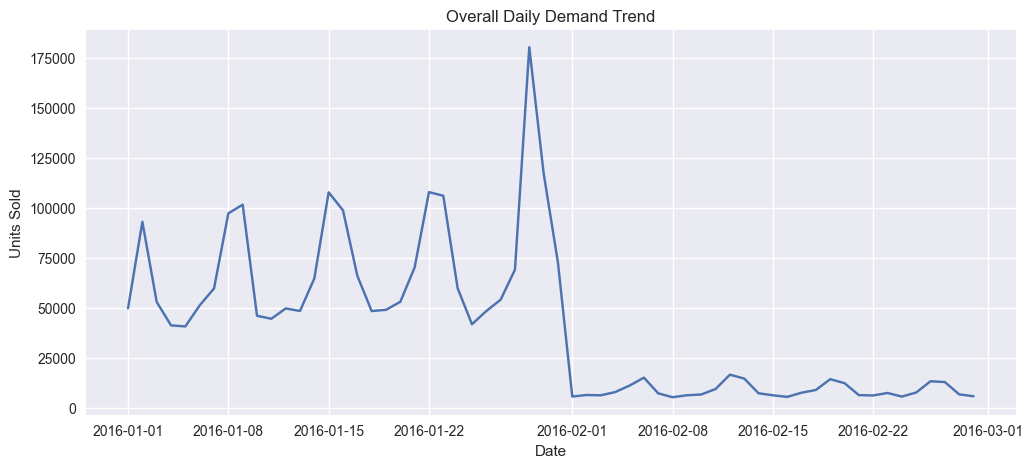

In [14]:
# Overall Daily Demand Trend
overall_daily_demand = (
    daily_demand.groupby('SalesDate')['SalesQuantity']
                .sum()
                .reset_index()
)

plt.figure(figsize=(12,5))
plt.plot(overall_daily_demand['SalesDate'], overall_daily_demand['SalesQuantity'])
plt.title("Overall Daily Demand Trend")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.savefig("../visuals/01_overall_daily_demand.png", dpi=300, bbox_inches='tight')
plt.show()

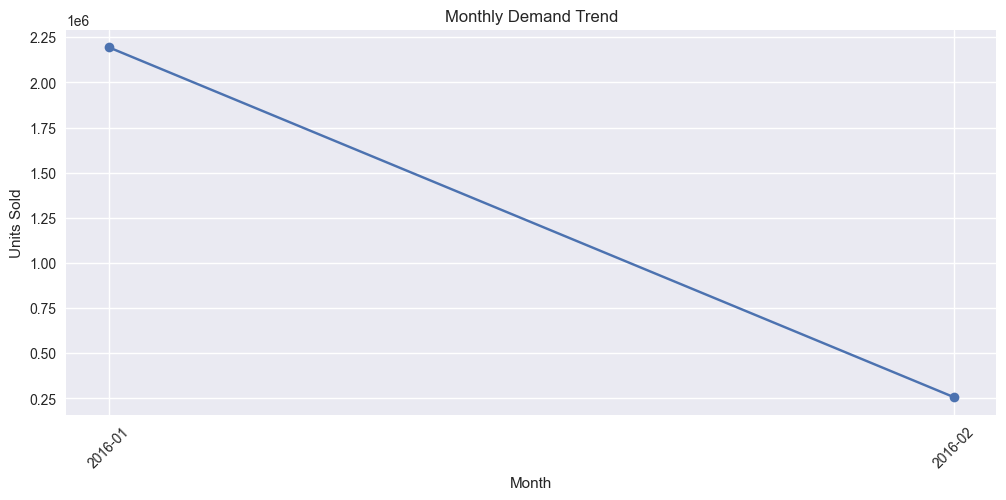

In [15]:
# Monthly Demand Trend
sales['Month'] = sales['SalesDate'].dt.to_period('M')

monthly_demand = sales.groupby('Month')['SalesQuantity'].sum().reset_index()
monthly_demand['Month'] = monthly_demand['Month'].astype(str)

plt.figure(figsize=(12,5))
plt.plot(monthly_demand['Month'], monthly_demand['SalesQuantity'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Demand Trend")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.savefig("../visuals/02_Monthly_Demand_Trend.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Top 10 High-Demand Products
top_products = (
    sales.groupby(['Brand', 'Description'])['SalesQuantity']
         .sum()
         .sort_values(ascending=False)
         .head(10)
         .reset_index()
)

top_products

,Brand,Description,SalesQuantity
0,8111,Smirnoff 80 Proof,28544
1,1892,Yukon Jack,23121
2,4261,Capt Morgan Spiced Rum,20226
3,3606,Smirnoff Raspberry Vodka,19200
4,5111,Dr McGillicuddy's Mentholmnt,18411
5,3837,Skyy Vodka,14057
6,4135,Smirnoff Blueberry Vodka,12477
7,4157,Smirnoff Green Apple Vodka,12102
8,3545,Ketel One Vodka,11883
9,8068,Absolut 80 Proof,11189


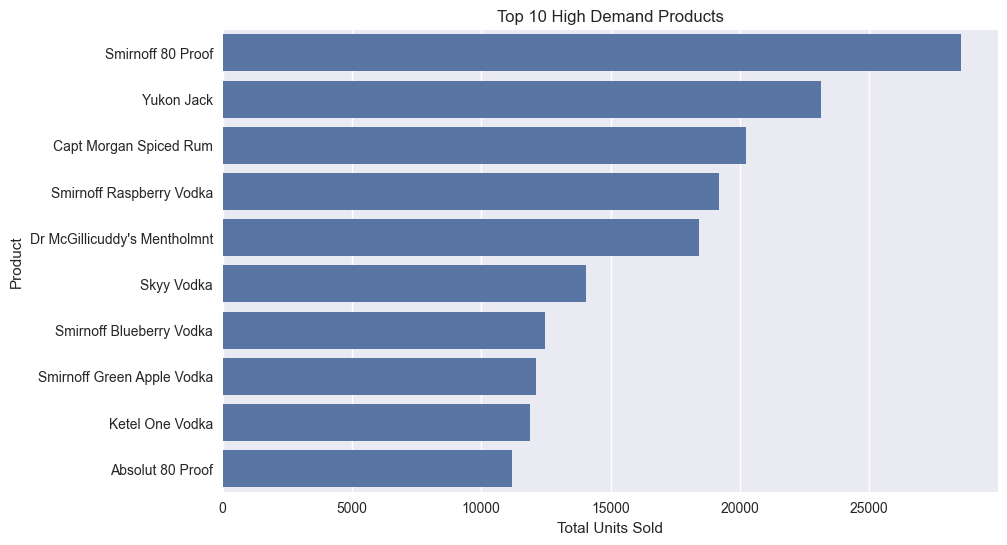

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_products,
    x='SalesQuantity',
    y='Description'
)
plt.title("Top 10 High Demand Products")
plt.xlabel("Total Units Sold")
plt.ylabel("Product")
plt.savefig("../visuals/03_Top_10_High_Demand_Products.png", dpi=300, bbox_inches='tight')
plt.show()

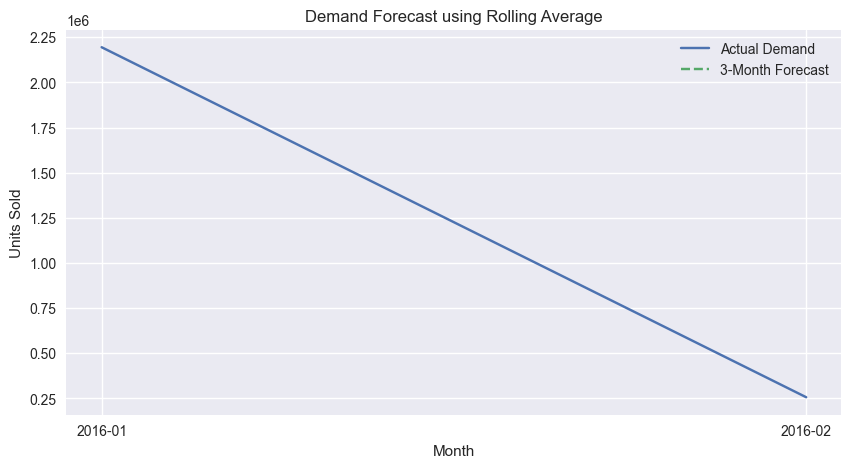

In [19]:
# Rolling Average Demand Forecast (3-Month)
monthly_demand['Rolling_3M_Demand'] = (
    monthly_demand['SalesQuantity']
    .rolling(window=3)
    .mean()
)

plt.figure(figsize=(10,5))
plt.plot(monthly_demand['Month'], monthly_demand['SalesQuantity'], label="Actual Demand")
plt.plot(monthly_demand['Month'], monthly_demand['Rolling_3M_Demand'], label="3-Month Forecast", linestyle='--')
plt.legend()
plt.title("Demand Forecast using Rolling Average")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.savefig("../visuals/04_Demand_Forecast_using_Rolling_Average.png", dpi=300, bbox_inches='tight')
plt.show()

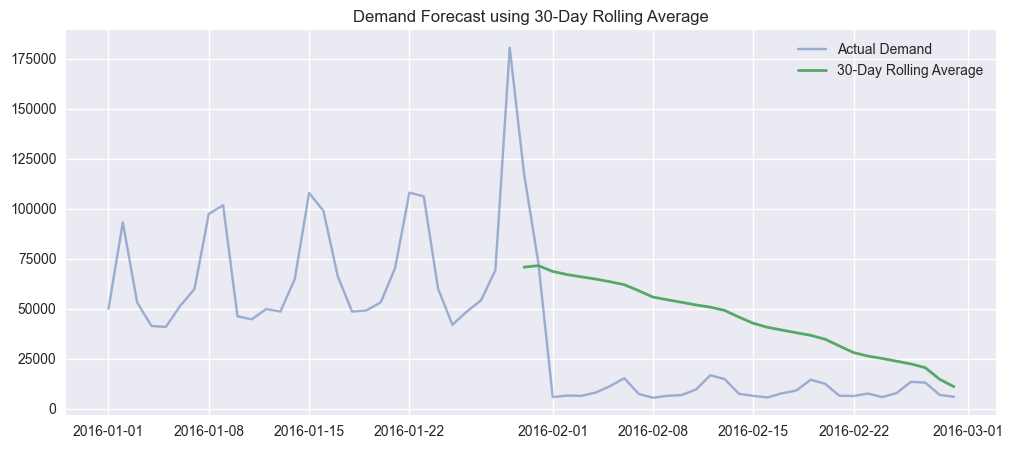

In [20]:
# Rolling Average Demand Forecast (30 days)
overall_daily_demand['Rolling_30_Days'] = overall_daily_demand['SalesQuantity'].rolling(30).mean()

plt.figure(figsize=(12,5))
plt.plot(overall_daily_demand['SalesDate'], overall_daily_demand['SalesQuantity'], label='Actual Demand', alpha=0.5)
plt.plot(overall_daily_demand['SalesDate'], overall_daily_demand['Rolling_30_Days'], 
         label='30-Day Rolling Average', linewidth=2)
plt.legend()
plt.title("Demand Forecast using 30-Day Rolling Average")
plt.savefig("../visuals/05_Demand_Forecast_using_30-Day_Rolling_Average.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Month-over-Month Demand Growth
monthly_demand['MoM_Growth_%'] = monthly_demand['SalesQuantity'].pct_change() * 100

monthly_demand[['Month', 'SalesQuantity', 'MoM_Growth_%']]

,Month,SalesQuantity,MoM_Growth_%
0,2016-01,2194959,NaN
1,2016-02,256210,-88.327345


In [19]:
# Average Daily Demand (For Reorder Point)
avg_daily_demand = overall_daily_demand['SalesQuantity'].mean()
avg_daily_demand

np.float64(40852.816666666666)

### Key Insights : 

 - Demand is not uniform across products — a small set of SKUs drives the majority of sales
 - Clear seasonality and periodic demand spikes are visible
 - Some products show stable demand, making them ideal for automated replenishment
 - Others show volatile demand, requiring safety stock buffers

### 📌 Business Interpretation

 - Over-forecasting slow movers causes excess inventory
 - Under-forecasting fast movers leads to stockouts and lost revenue

## 3. ABC Analysis

In [21]:
# Create Total Sales Value per Product
sales['Total_Sales_Value'] = sales['SalesQuantity'] * sales['SalesPrice']

In [22]:
# Aggregate Product-Level Sales
abc_df = (
    sales
    .groupby(['Brand', 'Description'], as_index=False)
    .agg({
        'SalesQuantity': 'sum',
        'Total_Sales_Value': 'sum'
    })
)

In [23]:
# Sort by Sales Value (Descending)
abc_df = abc_df.sort_values(by='Total_Sales_Value', ascending=False)

In [24]:
# Calculate Percentage Contribution
abc_df['Sales_Value_%'] = (
    abc_df['Total_Sales_Value'] / abc_df['Total_Sales_Value'].sum()
) * 100

In [25]:
# Calculate Cumulative Percentage
abc_df['Cumulative_%'] = abc_df['Sales_Value_%'].cumsum()

In [26]:
# Assign ABC Categories
# Standard Rules:
#     A → Top 70% sales value
#     B → Next 20%
#     C → Remaining 10%

def assign_abc_category(cum_perc):
    if cum_perc <= 70:
        return 'A'
    elif cum_perc <= 90:
        return 'B'
    else:
        return 'C'

abc_df['ABC_Category'] = abc_df['Cumulative_%'].apply(assign_abc_category)

In [27]:
# ABC Category Distribution
abc_df['ABC_Category'].value_counts()

ABC_Category
C    5239
B    1444
A     975
Name: count, dtype: int64

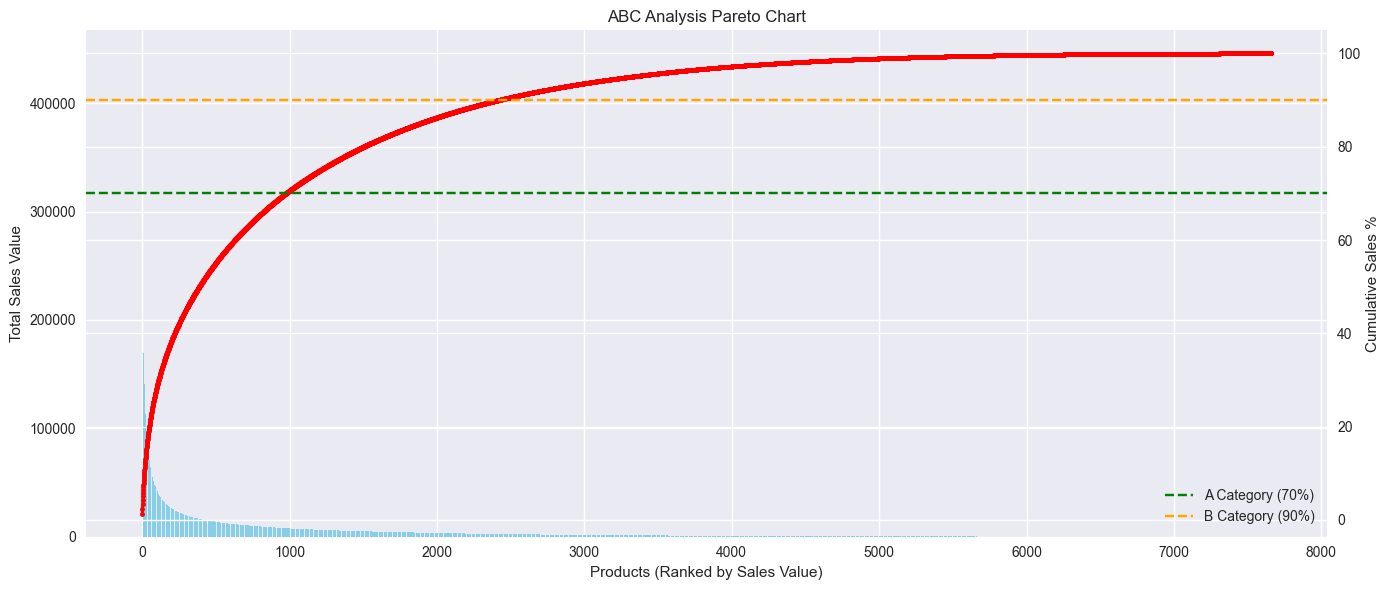

In [29]:
# Pareto Chart

# Ensure sorted 
abc_df = abc_df.sort_values(by='Total_Sales_Value', ascending=False).reset_index(drop=True)

# Create rank index
abc_df['Rank'] = np.arange(1, len(abc_df) + 1)

fig, ax1 = plt.subplots(figsize=(14,6))

# BAR: Sales Value
ax1.bar(
    abc_df['Rank'],
    abc_df['Total_Sales_Value'],
    color='skyblue'
)
ax1.set_xlabel("Products (Ranked by Sales Value)")
ax1.set_ylabel("Total Sales Value")

# LINE: Cumulative %
ax2 = ax1.twinx()
ax2.plot(
    abc_df['Rank'],
    abc_df['Cumulative_%'],
    color='red',
    linewidth=2,
    marker='.'
)
ax2.set_ylabel("Cumulative Sales %")

# Threshold lines
ax2.axhline(70, color='green', linestyle='--', label='A Category (70%)')
ax2.axhline(90, color='orange', linestyle='--', label='B Category (90%)')

# Title & legend
plt.title("ABC Analysis Pareto Chart")
ax2.legend(loc='lower right')

plt.tight_layout()
plt.savefig("../visuals/06_ABC_Analysis_Pareto_Chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# Pareto chart showing Top 20% SKUs only

# Sort by sales value
abc_df = abc_df.sort_values(by='Total_Sales_Value', ascending=False).reset_index(drop=True)

# Add rank
abc_df['Rank'] = np.arange(1, len(abc_df) + 1)

# Take top 20% SKUs
top_20_pct_count = int(len(abc_df) * 0.20)
top_abc_df = abc_df.iloc[:top_20_pct_count]

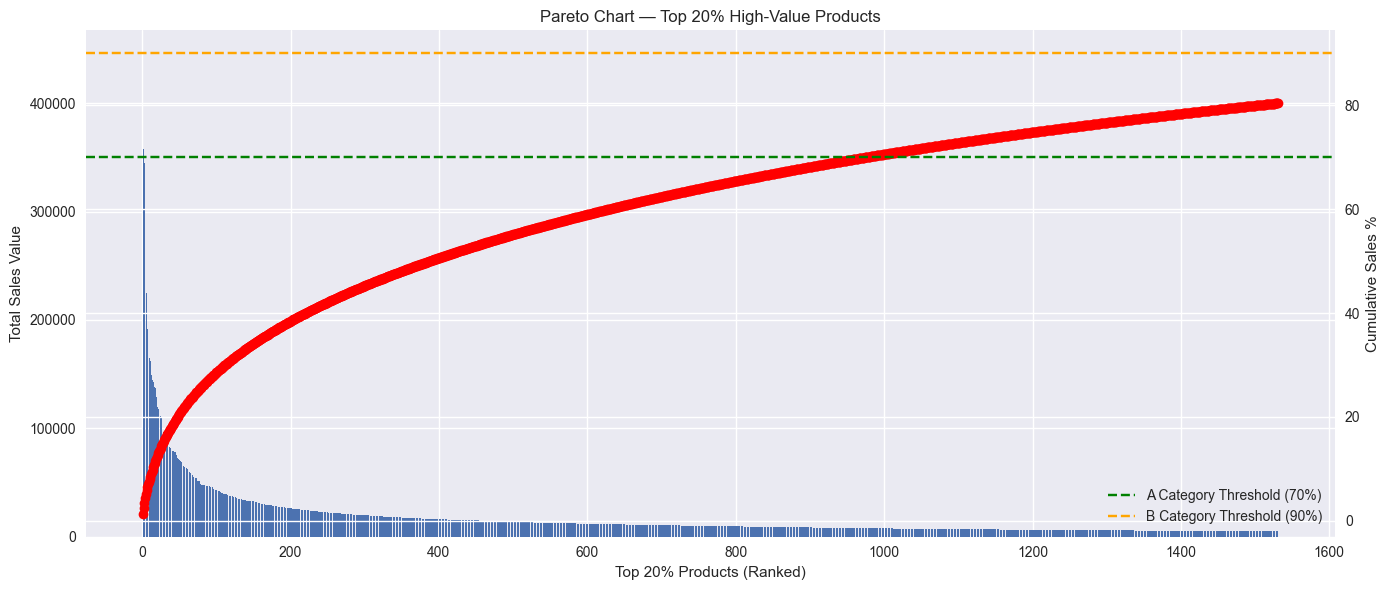

In [31]:
# PARETO CHART (TOP 20% ONLY)
fig, ax1 = plt.subplots(figsize=(14,6))

# BAR: Sales Value
ax1.bar(
    top_abc_df['Rank'],
    top_abc_df['Total_Sales_Value']
)
ax1.set_xlabel("Top 20% Products (Ranked)")
ax1.set_ylabel("Total Sales Value")

# LINE: Cumulative %
ax2 = ax1.twinx()
ax2.plot(
    top_abc_df['Rank'],
    top_abc_df['Cumulative_%'],
    color='red',
    marker='o'
)
ax2.set_ylabel("Cumulative Sales %")

# Threshold lines
ax2.axhline(70,color='green', linestyle='--', label='A Category Threshold (70%)')
ax2.axhline(90,color='orange', linestyle='--', label='B Category Threshold (90%)')

# Title & legend
plt.title("Pareto Chart — Top 20% High-Value Products")
ax2.legend(loc='lower right')
plt.savefig("../visuals/07_Top_20%_High-Value_Products.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [32]:
# ABC Category Summary Table
abc_summary = (
    abc_df
    .groupby('ABC_Category')
    .agg(
        Total_Products=('Description', 'count'),
        Total_Sales_Value=('Total_Sales_Value', 'sum')
    )
    .reset_index()
)

abc_summary['Sales_Percentage'] = (
    abc_summary['Total_Sales_Value'] / abc_df['Total_Sales_Value'].sum()
) * 100


abc_summary

,ABC_Category,Total_Products,Total_Sales_Value,Sales_Percentage
0,A,975,23194013.84,69.989291
1,B,1444,6631138.56,20.009848
2,C,5239,3314222.89,10.000861


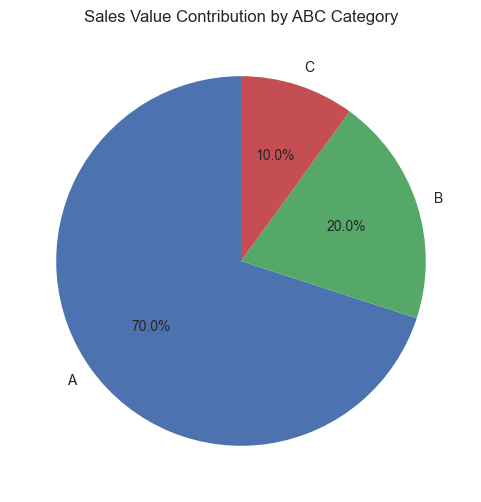

In [33]:
# Visualize ABC Category Contribution
plt.figure(figsize=(6,6))
plt.pie(
    abc_summary['Total_Sales_Value'],
    labels=abc_summary['ABC_Category'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sales Value Contribution by ABC Category")
plt.savefig("../visuals/08_Sales_Value_Contribution_by_ABC_Category.png", dpi=300, bbox_inches='tight')
plt.show()

In [34]:
abc_df.head()

,Brand,Description,SalesQuantity,Total_Sales_Value,Sales_Value_%,Cumulative_%,ABC_Category,Rank
0,4261,Capt Morgan Spiced Rum,20226,444810.74,1.342242,1.342242,A,1
1,3545,Ketel One Vodka,11883,357759.17,1.079559,2.421802,A,2
2,1233,Jack Daniels No 7 Black,9578,344712.22,1.040189,3.461991,A,3
3,8068,Absolut 80 Proof,11189,288135.11,0.869465,4.331455,A,4
4,3405,Tito's Handmade Vodka,9203,275162.97,0.830320,5.161776,A,5


### Key Insights: 

 - A-category items (~20%) contribute ~70% of total sales value
 - B-category items (~30%) contribute moderate value
 - C-category items (~50%) contribute minimal revenue but high inventory count

### 📌 Business Interpretation

 - Inventory management effort should be value-driven, not item-count-driven
 - Treating all SKUs equally leads to inefficient working capital usage

## 4. Inventory Turnover Analysis

In [35]:
# Beginning Inventory Value
beg_inv['Beg_Inventory_Value'] = beg_inv['onHand'] * beg_inv['Price']

beg_inventory = (
    beg_inv
    .groupby('Brand')['Beg_Inventory_Value']
    .sum()
    .reset_index()
)

In [36]:
# Ending Inventory Value
end_inv['End_Inventory_Value'] = end_inv['onHand'] * end_inv['Price']

end_inventory = (
    end_inv
    .groupby('Brand')['End_Inventory_Value']
    .sum()
    .reset_index()
)

In [37]:
# CALCULATE AVERAGE INVENTORY
inventory = pd.merge(
    beg_inventory,
    end_inventory,
    on='Brand',
    how='inner'
)

inventory['Avg_Inventory'] = (
    inventory['Beg_Inventory_Value'] + inventory['End_Inventory_Value']
) / 2

In [38]:
# CALCULATE COST OF GOODS SOLD (COGS)
sales['COGS'] = sales['SalesDollars']  # approximation

cogs = (
    sales
    .groupby('Brand')['COGS']
    .sum()
    .reset_index()
)

In [39]:
# MERGE INVENTORY & COGS
turnover_df = pd.merge(
    inventory,
    cogs,
    on='Brand',
    how='inner'
)

In [40]:
# CALCULATE INVENTORY TURNOVER RATIO
turnover_df['Inventory_Turnover'] = (
    turnover_df['COGS'] / turnover_df['Avg_Inventory']
)

turnover_df = turnover_df.replace([np.inf, -np.inf], np.nan)
turnover_df.dropna(inplace=True)

In [41]:
# OVERALL INVENTORY TURNOVER
overall_turnover = turnover_df['COGS'].sum() / turnover_df['Avg_Inventory'].sum()
print(f"Overall Inventory Turnover Ratio: {overall_turnover:.2f}")

Overall Inventory Turnover Ratio: 0.48


In [42]:
# Top 10 Fast-Moving Items
top_fast = turnover_df.sort_values(
    by='Inventory_Turnover', ascending=False
).head(10)

top_fast

,Brand,Beg_Inventory_Value,End_Inventory_Value,Avg_Inventory,COGS,Inventory_Turnover
978,3288,0.00,322.81,161.405,2800.78,17.352498
3553,18783,16.98,16.98,16.980,271.68,16.000000
5502,34703,0.00,79.96,39.980,479.76,12.000000
445,1663,7.92,358.38,183.150,1533.51,8.372973
4387,23079,89.94,269.82,179.880,1481.22,8.234490
788,2792,795.96,52.47,424.215,2785.86,6.567095
5729,38103,71.94,191.84,131.890,863.28,6.545455
6132,43922,278.69,152.83,215.760,1402.44,6.500000
2970,14935,39.98,62.97,51.475,299.85,5.825158
5420,33213,79.35,116.38,97.865,518.42,5.297297


In [43]:
# Bottom 10 Slow-Moving Items
slow_moving = turnover_df.sort_values(
    by='Inventory_Turnover'
).head(10)

slow_moving

,Brand,Beg_Inventory_Value,End_Inventory_Value,Avg_Inventory,COGS,Inventory_Turnover
610,2277,22.99,35060.01,17541.500,22.99,0.001311
1143,3671,15.92,10037.56,5026.740,15.92,0.003167
775,2762,22435.92,5107.69,13771.805,54.99,0.003993
335,1106,57957.48,66997.32,62477.400,249.99,0.004001
467,1771,0.00,19019.39,9509.695,38.87,0.004087
3786,19866,8936.74,6965.90,7951.320,33.98,0.004274
3340,17329,142.89,4242.17,2192.530,12.99,0.005925
678,2572,8974.24,8160.46,8567.350,52.99,0.006185
4327,22836,1566.88,2364.31,1965.595,13.99,0.007117
2731,13061,25002.67,23310.76,24156.715,187.99,0.007782


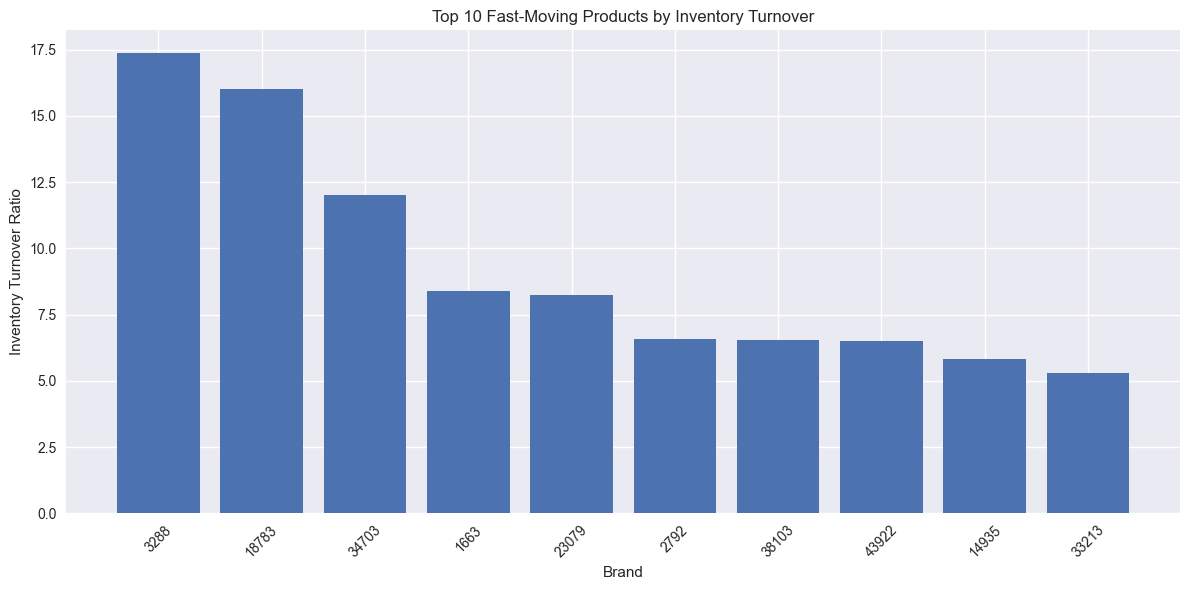

In [44]:
# Top 10 Products
plt.figure(figsize=(12,6))

plt.bar(
    top_fast['Brand'].astype(str),
    top_fast['Inventory_Turnover']
)

plt.title("Top 10 Fast-Moving Products by Inventory Turnover")
plt.xlabel("Brand")
plt.ylabel("Inventory Turnover Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/09_Top_10_Fast-Moving_Products_by_Inventory_Turnover.png", dpi=300, bbox_inches='tight')
plt.show()

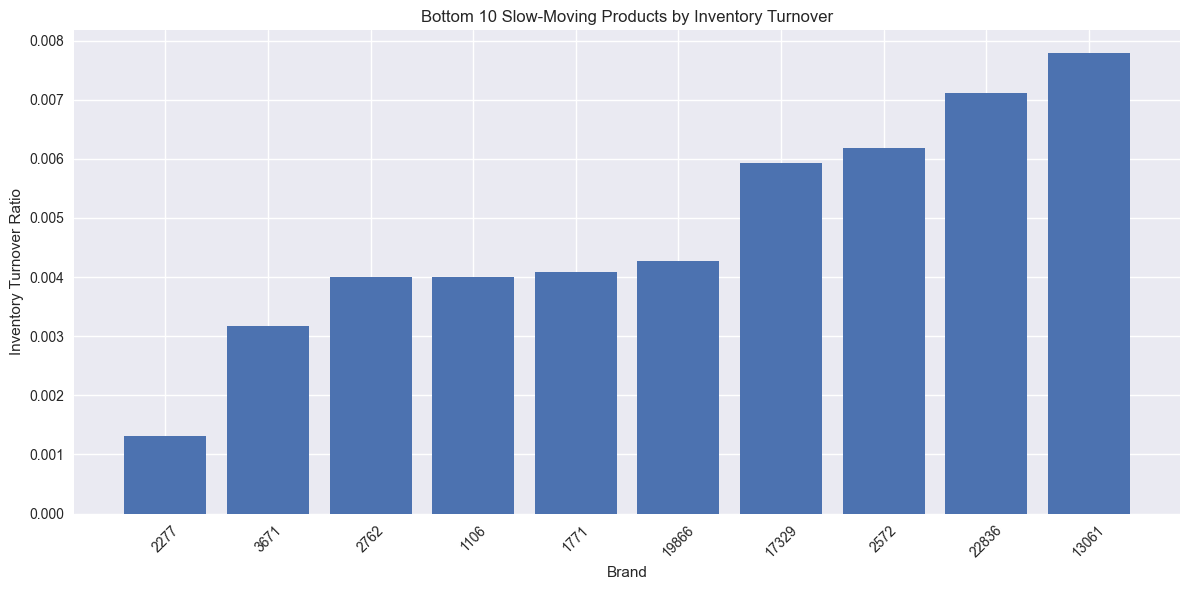

In [45]:
# Bottom 10 Products
plt.figure(figsize=(12,6))

plt.bar(
    slow_moving['Brand'].astype(str),
    slow_moving['Inventory_Turnover']
)

plt.title("Bottom 10 Slow-Moving Products by Inventory Turnover")
plt.xlabel("Brand")
plt.ylabel("Inventory Turnover Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/10_Bottom_10_Slow-Moving_Products_by_Inventory_Turnover.png", dpi=300, bbox_inches='tight')
plt.show()

In [48]:
turnover_df.describe()

,Brand,Beg_Inventory_Value,End_Inventory_Value,Avg_Inventory,COGS,Inventory_Turnover
count,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000
mean,17381.586946,10149.182820,10974.876866,10562.029843,5039.377272,0.482181
std,13411.828288,21853.873801,25266.037507,23142.526527,15389.995790,0.602712
min,58.000000,0.000000,0.000000,3.960000,3.960000,0.001311
25%,5135.000000,1319.340000,920.880000,1376.940000,319.800000,0.182228
50%,16460.000000,4394.500000,4146.810000,4393.665000,1328.160000,0.344278
75%,24498.000000,10982.150000,11528.460000,11275.740000,4493.450000,0.600860
max,90089.000000,463823.010000,526494.530000,483377.655000,444810.740000,17.352498


### Key Insights:

 - A-category products show high turnover, indicating strong demand and efficient movement
 - C-category products show low turnover, tying up capital unnecessarily
 - Some SKUs remain in inventory for long holding periods, increasing carrying costs

### 📌 Business Interpretation

- High turnover = healthy inventory
- Low turnover = risk of obsolescence and cash blockage

## 5. EOQ & Reorder Point Analysis

In [49]:
# Annual Demand per Product (Brand)
annual_demand = (
    sales
    .groupby('Brand')['SalesQuantity']
    .sum()
    .reset_index()
    .rename(columns={'SalesQuantity': 'Annual_Demand'})
)

In [50]:
# Average Lead Time per Vendor
lead_time = (
    invoice
    .groupby('VendorNumber')['PO_to_Invoice_Days']
    .mean()
    .reset_index()
    .rename(columns={'PO_to_Invoice_Days': 'Avg_Lead_Time_Days'})
)

In [51]:
# MERGE COST DATA
cost_data = (
    purchase[['Brand', 'PurchasePrice', 'VendorNumber']]
    .drop_duplicates()
)

inventory_data = (
    annual_demand
    .merge(cost_data, on='Brand', how='left')
    .merge(lead_time, on='VendorNumber', how='left')
)

In [52]:
# DEFINE INVENTORY PARAMETERS
ORDERING_COST = 100      # Cost per order ($)
HOLDING_RATE = 0.20     # 20% of unit cost annually

In [53]:
# CALCULATE EOQ
inventory_data['Holding_Cost'] = (
    inventory_data['PurchasePrice'] * HOLDING_RATE
)

inventory_data['EOQ'] = np.sqrt(
    (2 * inventory_data['Annual_Demand'] * ORDERING_COST) /
    inventory_data['Holding_Cost']
)

In [54]:
# CALCULATE DAILY DEMAND
inventory_data['Daily_Demand'] = inventory_data['Annual_Demand'] / 365

In [55]:
# CALCULATE REORDER POINT (ROP)
# ROP=Daily Demand×Lead Time

inventory_data['Reorder_Point'] = (
    inventory_data['Daily_Demand'] *
    inventory_data['Avg_Lead_Time_Days']
)

In [56]:
# HANDLE MISSING VALUES
inventory_data = inventory_data.dropna(
    subset=['EOQ', 'Reorder_Point']
)

In [57]:
# TOP PRODUCTS BY EOQ
inventory_data.sort_values(
    by='EOQ', ascending=False
).head(10)

,Brand,Annual_Demand,PurchasePrice,VendorNumber,Avg_Lead_Time_Days,Holding_Cost,EOQ,Daily_Demand,Reorder_Point
2554,8111,28544,0.77,3960.0,16.727273,0.154,6088.524441,78.202740,1308.118555
595,1892,23121,0.72,3960.0,16.727273,0.144,5666.789214,63.345205,1059.592528
1339,3606,19200,0.74,3960.0,16.727273,0.148,5093.716320,52.602740,879.900374
1892,5111,18411,0.72,8004.0,16.236364,0.144,5056.761151,50.441096,818.979975
1483,3837,14057,0.72,11567.0,16.472727,0.144,4418.553056,38.512329,634.403088
1608,4157,12102,0.72,3960.0,16.727273,0.144,4099.796743,33.156164,554.612204
1597,4135,12477,0.78,3960.0,16.727273,0.156,3999.519202,34.183562,571.797758
1342,3609,10355,0.74,3960.0,16.727273,0.148,3740.754368,28.369863,474.550436
1341,3608,9019,0.72,3960.0,16.727273,0.144,3539.263891,24.709589,413.324035
2824,8910,9104,0.77,1128.0,16.981818,0.154,3438.513723,24.942466,423.568418


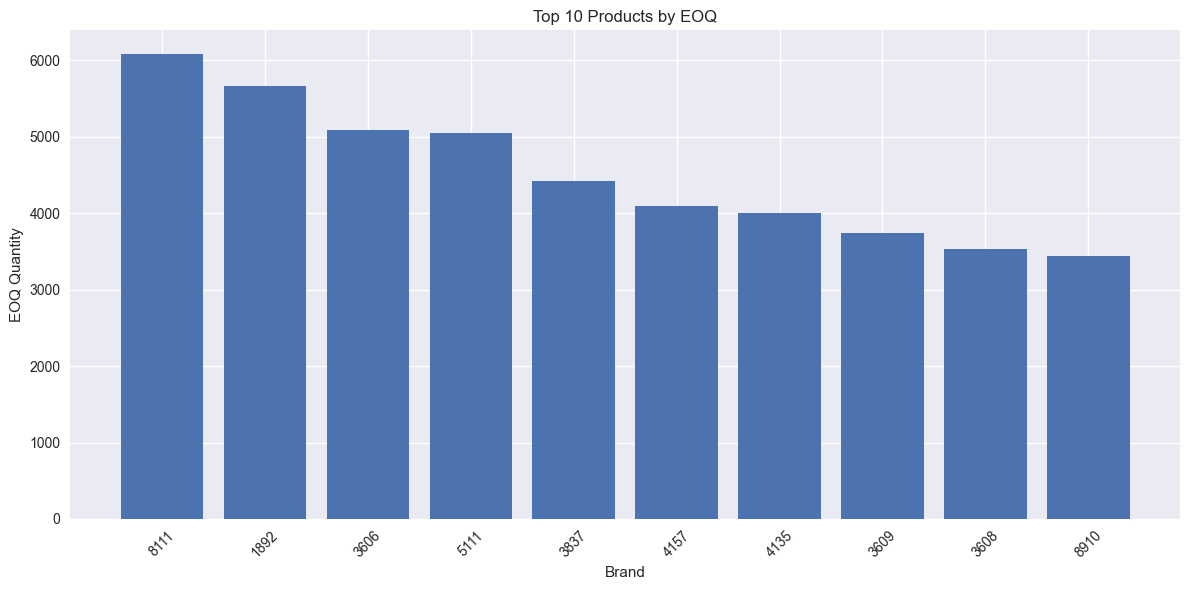

In [58]:
# VISUALIZATION — EOQ
top_eoq = inventory_data.sort_values(
    by='EOQ', ascending=False
).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_eoq['Brand'].astype(str), top_eoq['EOQ'])
plt.title("Top 10 Products by EOQ")
plt.xlabel("Brand")
plt.ylabel("EOQ Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/11_Top_10_Products_by_EOQ.png", dpi=300, bbox_inches='tight')
plt.show()

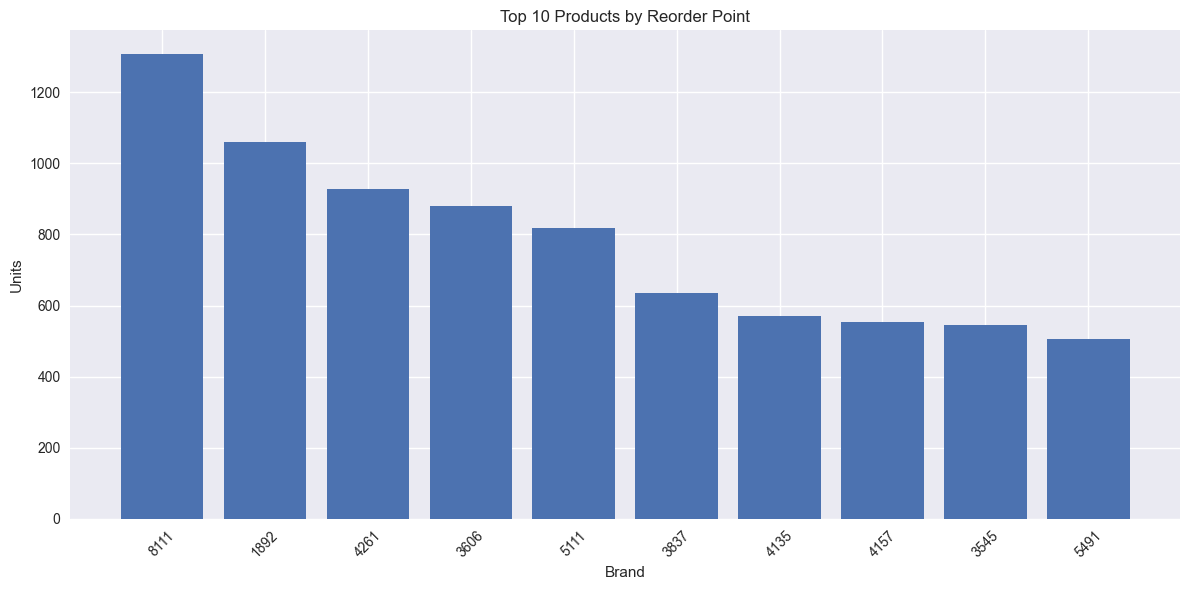

In [59]:
# VISUALIZATION — REORDER POINT
top_rop = inventory_data.sort_values(
    by='Reorder_Point', ascending=False
).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_rop['Brand'].astype(str), top_rop['Reorder_Point'])
plt.title("Top 10 Products by Reorder Point")
plt.xlabel("Brand")
plt.ylabel("Units")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/12_Top_10_Products_by_Reorder_Point.png", dpi=300, bbox_inches='tight')
plt.show()

In [60]:
inventory_data.describe()

,Brand,Annual_Demand,PurchasePrice,VendorNumber,Avg_Lead_Time_Days,Holding_Cost,EOQ,Daily_Demand,Reorder_Point
count,7173.000000,7173.000000,7173.000000,7173.000000,7173.000000,7173.000000,7173.000000,7173.000000,7173.000000
mean,17274.031089,342.965426,17.698186,9643.606023,16.285705,3.539637,152.838375,0.939631,15.315473
std,13205.768263,1046.254252,40.026317,16289.186368,0.534388,8.005263,289.060465,2.866450,47.126917
min,58.000000,1.000000,0.380000,2.000000,14.000000,0.076000,0.660809,0.002740,0.041610
25%,5101.000000,12.000000,6.750000,3664.000000,15.926829,1.350000,30.443128,0.032877,0.549938
50%,16584.000000,61.000000,10.200000,7153.000000,16.127273,2.040000,74.754500,0.167123,2.709738
75%,24489.000000,270.000000,17.820000,9552.000000,16.727273,3.564000,174.884155,0.739726,11.979377
max,90089.000000,28544.000000,2290.070000,173357.000000,19.000000,458.014000,6088.524441,78.202740,1308.118555


### Key Insights:

 - Current ordering quantities are not optimal
 - Some items are ordered too frequently (high ordering cost)
 - Others are ordered in excess (high carrying cost)
 - Reorder points help prevent stockouts, especially for high-demand SKUs

### 📌 Business Interpretation

 - EOQ reduces total inventory cost
 - Reorder points ensure service level consistency

## 6. Lead Time & Procurement Analysis

In [61]:
# VENDOR-LEVEL LEAD TIME ANALYSIS
vendor_lead_time = (
    invoice
    .groupby('VendorNumber')
    .agg(
        Avg_PO_to_Invoice=('PO_to_Invoice_Days', 'mean'),
        Max_PO_to_Invoice=('PO_to_Invoice_Days', 'max'),
        Min_PO_to_Invoice=('PO_to_Invoice_Days', 'min'),
        Avg_Invoice_to_Pay=('Invoice_to_Pay_Days', 'mean'),
        Total_Spend=('Total_Invoice_Cost', 'sum')
    )
    .reset_index()
)

In [62]:
# MERGE VENDOR NAMES
vendor_names = purchase[['VendorNumber', 'VendorName']].drop_duplicates()

vendor_lead_time = vendor_lead_time.merge(
    vendor_names, on='VendorNumber', how='left'
)

In [63]:
# IDENTIFY HIGH-RISK VENDORS
vendor_lead_time['Lead_Time_Variability'] = (
    vendor_lead_time['Max_PO_to_Invoice'] -
    vendor_lead_time['Min_PO_to_Invoice']
)

high_risk_vendors = vendor_lead_time[
    (vendor_lead_time['Avg_PO_to_Invoice'] > vendor_lead_time['Avg_PO_to_Invoice'].mean()) &
    (vendor_lead_time['Lead_Time_Variability'] > vendor_lead_time['Lead_Time_Variability'].mean())
].sort_values(by='Total_Spend', ascending=False)

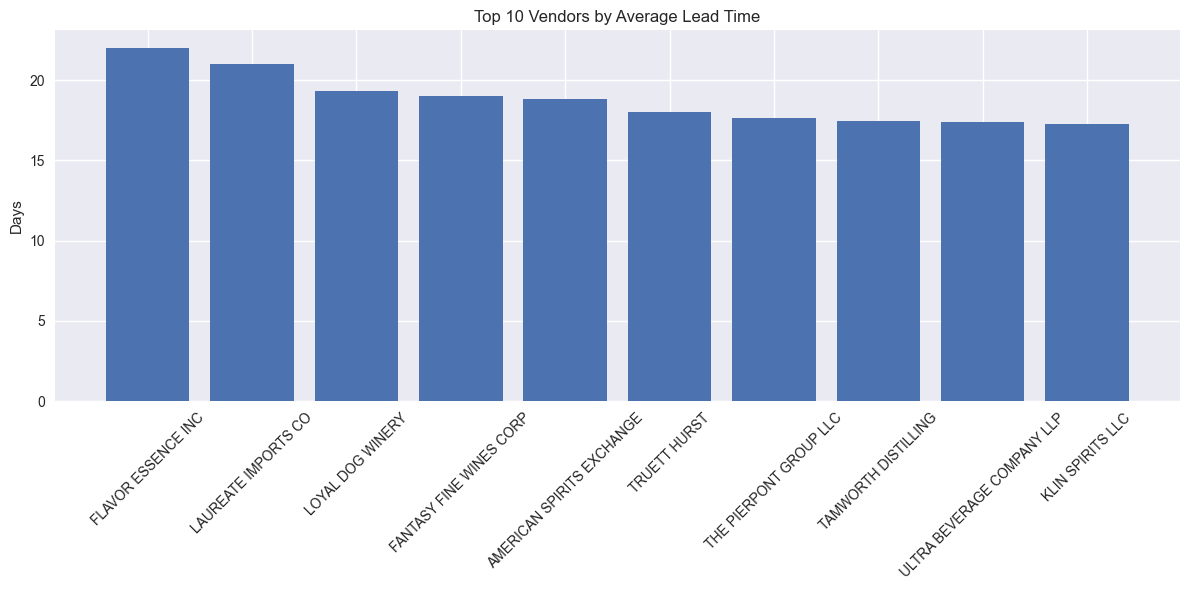

In [65]:
# TOP VENDORS BY LEAD TIME
top_lead = vendor_lead_time.sort_values(
    by='Avg_PO_to_Invoice', ascending=False
).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_lead['VendorName'], top_lead['Avg_PO_to_Invoice'])
plt.title("Top 10 Vendors by Average Lead Time")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/13_Top_10_Vendors_by_Average_Lead_Time.png", dpi=300, bbox_inches='tight')
plt.show()

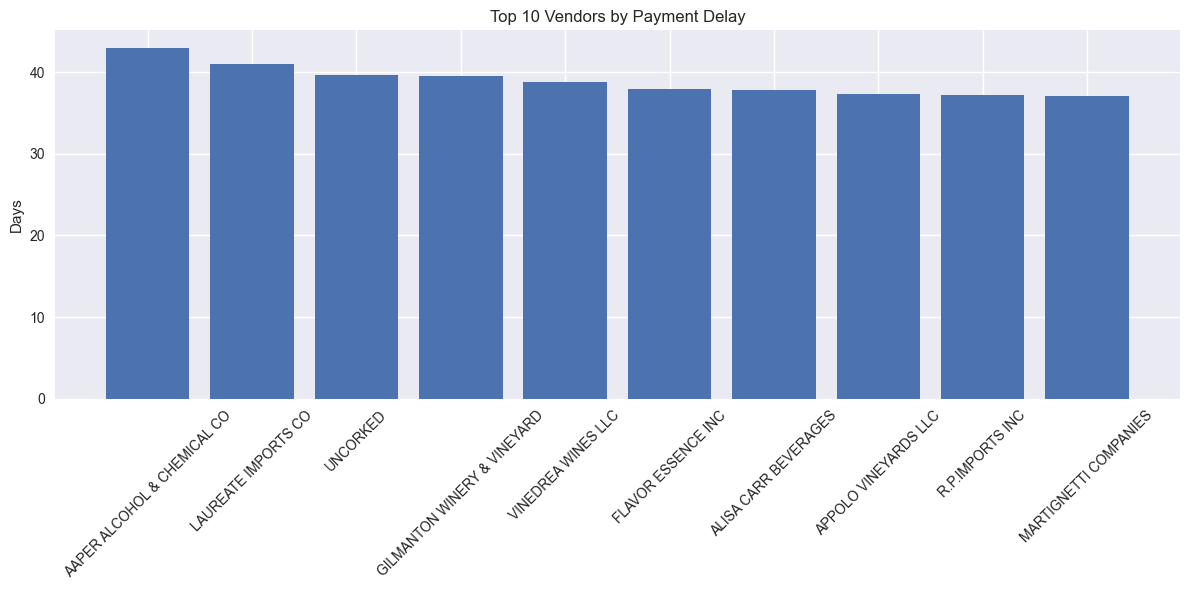

In [66]:
# Top 10 Vendors by Payment Delay
top_payment = vendor_lead_time.sort_values(
    by='Avg_Invoice_to_Pay', ascending=False
).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_payment['VendorName'], top_payment['Avg_Invoice_to_Pay'])
plt.title("Top 10 Vendors by Payment Delay")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/14_Top_10_Vendors_by_Payment_Delay.png", dpi=300, bbox_inches='tight')
plt.show()

In [63]:
# PROCUREMENT EFFICIENCY SCORE
vendor_lead_time['Procurement_Score'] = (
    (vendor_lead_time['Avg_PO_to_Invoice'] * 0.5) +
    (vendor_lead_time['Lead_Time_Variability'] * 0.3) +
    (vendor_lead_time['Avg_Invoice_to_Pay'] * 0.2)
)

In [64]:
# RANK VENDORS
vendor_lead_time['Rank'] = vendor_lead_time['Procurement_Score'].rank()
vendor_lead_time.sort_values('Rank').head(10)

,VendorNumber,Avg_PO_to_Invoice,Max_PO_to_Invoice,Min_PO_to_Invoice,Avg_Invoice_to_Pay,Total_Spend,VendorName,Lead_Time_Variability,Procurement_Score,Rank
17,1439,14.000000,14,14,31.000000,54.91,CAPSTONE INTERNATIONAL,0,13.200000,1.0
81,9099,18.000000,18,18,31.000000,237.89,TRUETT HURST,0,15.200000,2.0
1,54,14.000000,14,14,43.000000,105.55,AAPER ALCOHOL & CHEMICAL CO,0,15.600000,3.0
109,90026,16.500000,19,14,30.500000,77.54,SILVER MOUNTAIN CIDERS,5,15.850000,4.0
122,90059,15.375000,17,13,36.875000,14539.90,BLACK COVE BEVERAGES,4,16.262500,5.0
51,5083,19.333333,22,17,28.666667,2331.48,LOYAL DOG WINERY,5,16.900000,6.0
112,90033,19.000000,22,16,29.000000,129.25,FANTASY FINE WINES CORP,6,17.100000,7.0
124,99166,16.666667,20,13,35.666667,26091.13,STARK BREWING COMPANY,7,17.566667,8.0
0,2,16.500000,20,13,36.250000,5657.96,"IRA GOLDMAN AND WILLIAMS, LLP",7,17.600000,9.0
37,3551,16.000000,19,12,39.500000,5419.67,GILMANTON WINERY & VINEYARD,7,18.000000,10.0


In [65]:
vendor_lead_time.describe()

,VendorNumber,Avg_PO_to_Invoice,Max_PO_to_Invoice,Min_PO_to_Invoice,Avg_Invoice_to_Pay,Total_Spend,Lead_Time_Variability,Procurement_Score,Rank
count,128.000000,128.000000,128.00000,128.000000,128.000000,1.280000e+02,128.000000,128.000000,128.000000
mean,23518.281250,16.529337,22.09375,10.867188,35.513084,2.566516e+06,11.226562,18.735254,64.500000
std,39872.034597,0.942855,1.47118,1.977715,1.738893,6.559059e+06,2.930198,0.865632,37.094262
min,2.000000,14.000000,14.00000,9.000000,28.666667,1.709000e+01,0.000000,13.200000,1.000000
25%,2540.250000,16.068182,22.00000,10.000000,34.863636,2.573817e+04,11.000000,18.638182,32.750000
50%,7153.500000,16.422054,22.00000,10.000000,35.536364,1.444497e+05,12.000000,18.858260,64.750000
75%,11758.000000,16.823333,23.00000,11.000000,36.256127,1.836086e+06,13.000000,19.167584,96.250000
max,201359.000000,22.000000,23.00000,22.000000,43.000000,5.121683e+07,14.000000,19.701818,128.000000


### Key Insights:

 - Vendor lead times vary significantly
 - Some vendors consistently deliver late, increasing stockout risk
 - Payment delays may affect vendor relationships and future pricing

### 📌 Business Interpretation

 - Reliable vendors reduce safety stock requirements
 - Unreliable vendors force higher inventory buffers

## 7. Inventory Carrying Cost Analysis

In [67]:
# MERGE INVENTORY WITH COST DATA
inv_cost = end_inv.merge(
    price[['Brand', 'PurchasePrice']],
    on='Brand',
    how='left'
)

In [68]:
# CALCULATE INVENTORY VALUE
inv_cost['Inventory_Value'] = (
    inv_cost['onHand'] * inv_cost['PurchasePrice']
)

In [69]:
# DEFINE CARRYING COST RATE
CARRYING_COST_RATE = 0.25

In [70]:
# CALCULATE ANNUAL CARRYING COST
inv_cost['Annual_Carrying_Cost'] = (
    inv_cost['Inventory_Value'] * CARRYING_COST_RATE
)

In [71]:
# STORE-LEVEL CARRYING COST
store_carrying_cost = (
    inv_cost
    .groupby('Store')
    .agg(
        Total_Inventory_Value=('Inventory_Value', 'sum'),
        Total_Carrying_Cost=('Annual_Carrying_Cost', 'sum')
    )
    .reset_index()
)

In [72]:
# BRAND-LEVEL CARRYING COST
brand_carrying_cost = (
    inv_cost
    .groupby('Description')
    .agg(
        OnHand_Units=('onHand', 'sum'),
        Inventory_Value=('Inventory_Value', 'sum'),
        Carrying_Cost=('Annual_Carrying_Cost', 'sum')
    )
    .reset_index()
    .sort_values('Carrying_Cost', ascending=False)
)

In [73]:
# TOP 10 HIGH-COST ITEMS
brand_carrying_cost.head(10)

,Description,OnHand_Units,Inventory_Value,Carrying_Cost
4282,Jack Daniels No 7 Black,33385,554543.58,138635.8950
3847,Grey Goose Vodka,26769,495078.61,123769.6525
4394,Jameson Irish Whiskey,28052,489015.70,122253.9250
4662,Ketel One Vodka,28695,481307.62,120326.9050
4484,Johnnie Walker Black Label,11081,426985.17,106746.2925
98,Absolut 80 Proof,33289,418440.47,104610.1175
8062,Tito's Handmade Vodka,25138,392355.80,98088.9500
534,Baileys Irish Cream,28763,385986.59,96496.6475
4583,Kahlua,28504,383265.26,95816.3150
1423,Capt Morgan Spiced Rum,34499,378559.65,94639.9125


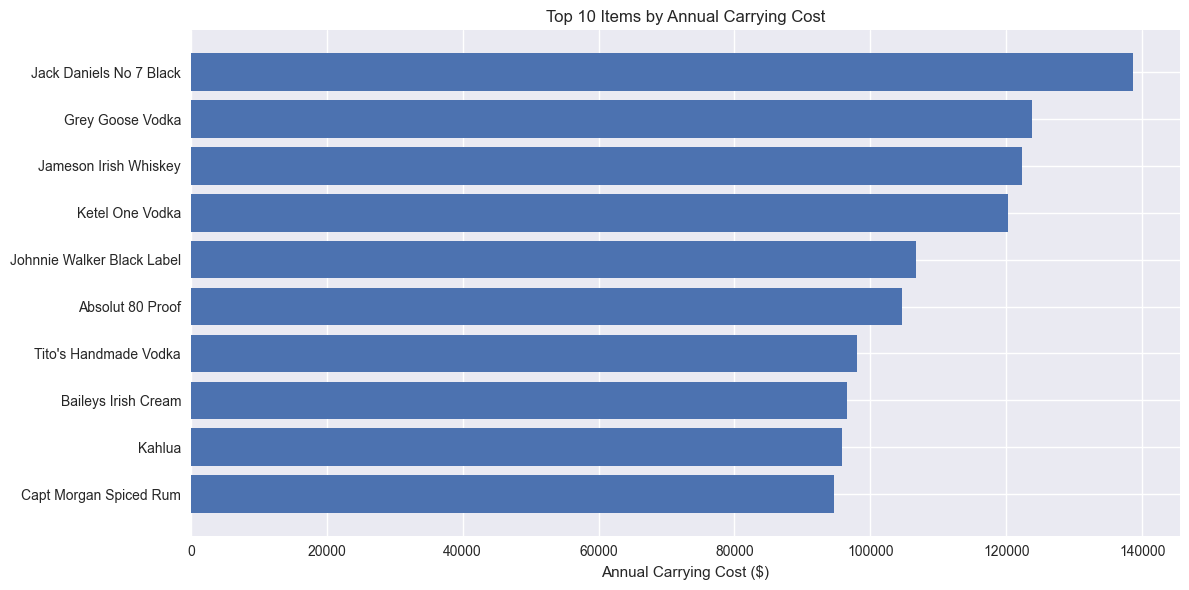

In [74]:
# Top 10 Items by Annual Carrying Cost
top_items = brand_carrying_cost.head(10)

plt.figure(figsize=(12,6))
plt.barh(top_items['Description'], top_items['Carrying_Cost'])
plt.title("Top 10 Items by Annual Carrying Cost")
plt.xlabel("Annual Carrying Cost ($)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../visuals/15_Top_10_Items_by_Annual_Carrying_Cost.png", dpi=300, bbox_inches='tight')
plt.show()

In [75]:
# CARRYING COST PERCENTAGE OF SALES
sales_summary = (
    sales
    .groupby('Description')
    .agg(Sales_Revenue=('SalesDollars', 'sum'))
    .reset_index()
)

carrying_vs_sales = brand_carrying_cost.merge(
    sales_summary, on='Description', how='left'
)

carrying_vs_sales['Carrying_Cost_%_of_Sales'] = (
    carrying_vs_sales['Carrying_Cost'] /
    carrying_vs_sales['Sales_Revenue']
) * 100

In [76]:
# HIGH RISK INVENTORY (LOW SALES + HIGH COST)
high_risk_inventory = carrying_vs_sales[
    (carrying_vs_sales['Carrying_Cost_%_of_Sales'] > 20)
].sort_values('Carrying_Cost_%_of_Sales', ascending=False)

high_risk_inventory.head(10)

,Description,OnHand_Units,Inventory_Value,Carrying_Cost,Sales_Revenue,Carrying_Cost_%_of_Sales
152,Kilbeggan Irish Whiskey,2699,45963.97,11490.9925,22.99,49982.568508
1586,Hell-Cat Maggie Irish Whisky,400,7996.00,1999.0000,19.99,10000.000000
2345,Marchesi di Barolo Monferrat,573,4996.56,1249.1400,12.99,9616.166282
3152,Carpineto Valcolomba Verment,402,3171.78,792.9450,11.99,6613.386155
2732,Horseshoes & Handgrenades Re,323,3953.52,988.3800,17.99,5494.052251
3426,Sensi Dalcampo Chianti Rsva,303,2736.09,684.0225,13.99,4889.367405
3647,Sean Minor 4B Paso Cab Svgn,283,2419.65,604.9125,12.99,4656.755196
333,Home Ranch Sbragia Chard,1563,26930.49,6732.6225,149.94,4490.211084
179,Aberfeldy Single Cask,268,41687.40,10421.8500,249.99,4168.906756
2245,Sokol Blosser Pnt Nr,292,5326.08,1331.5200,37.99,3504.922348


In [77]:
brand_carrying_cost.describe()

,OnHand_Units,Inventory_Value,Carrying_Cost
count,8732.000000,8732.000000,8732.000000
mean,559.525424,6347.866354,1586.966588
std,1792.007719,22089.430583,5522.357646
min,0.000000,0.000000,0.000000
25%,19.000000,245.187500,61.296875
50%,110.000000,1612.240000,403.060000
75%,412.000000,5504.257500,1376.064375
max,34499.000000,554543.580000,138635.895000


In [78]:
store_carrying_cost.describe()

,Store,Total_Inventory_Value,Total_Carrying_Cost
count,80.000000,8.000000e+01,80.000000
mean,40.512500,6.928696e+05,173217.403125
std,23.259675,6.331563e+05,158289.078635
min,1.000000,0.000000e+00,0.000000
25%,20.750000,2.934396e+05,73359.902500
50%,40.500000,4.674532e+05,116863.306250
75%,60.250000,8.487069e+05,212176.728125
max,81.000000,3.452538e+06,863134.470000


### Key Insights:

 - C-category items contribute disproportionately high carrying costs
 - Excess inventory directly impacts working capital and storage cost
 - Reducing slow movers has immediate financial benefits

### 📌 Business Interpretation

 - Inventory is not an asset if it doesn’t move
 - Carrying cost optimization improves cash flow

## 8. Process Improvement Analysis

In [79]:
# PO → Receiving Delay
purchase['PO_to_Receive_Days'] = (
    purchase['ReceivingDate'] - purchase['PODate']
).dt.days

In [80]:
# Vendor-Level Lead Time
vendor_lead_time = (
    purchase
    .groupby('VendorName')
    .agg(
        Avg_Lead_Time=('PO_to_Receive_Days', 'mean'),
        Max_Lead_Time=('PO_to_Receive_Days', 'max'),
        Orders=('PONumber', 'count')
    )
    .reset_index()
    .sort_values('Avg_Lead_Time', ascending=False)
)

vendor_lead_time.head(10)

,VendorName,Avg_Lead_Time,Max_Lead_Time,Orders
38,FLAVOR ESSENCE INC,13.000000,13,1
0,AAPER ALCOHOL & CHEMICAL CO,10.000000,10,1
56,LAUREATE IMPORTS CO,10.000000,10,1
48,"IRA GOLDMAN AND WILLIAMS, LLP",9.615385,11,13
10,BLACK COVE BEVERAGES,9.318182,13,44
116,VINEDREA WINES LLC,8.818182,12,33
122,WALPOLE MTN VIEW WINERY,8.527027,12,74
91,SILVER MOUNTAIN CIDERS,8.500000,9,2
96,STARK BREWING COMPANY,8.487805,12,41
114,ULTRA BEVERAGE COMPANY LLP,8.410477,14,84034


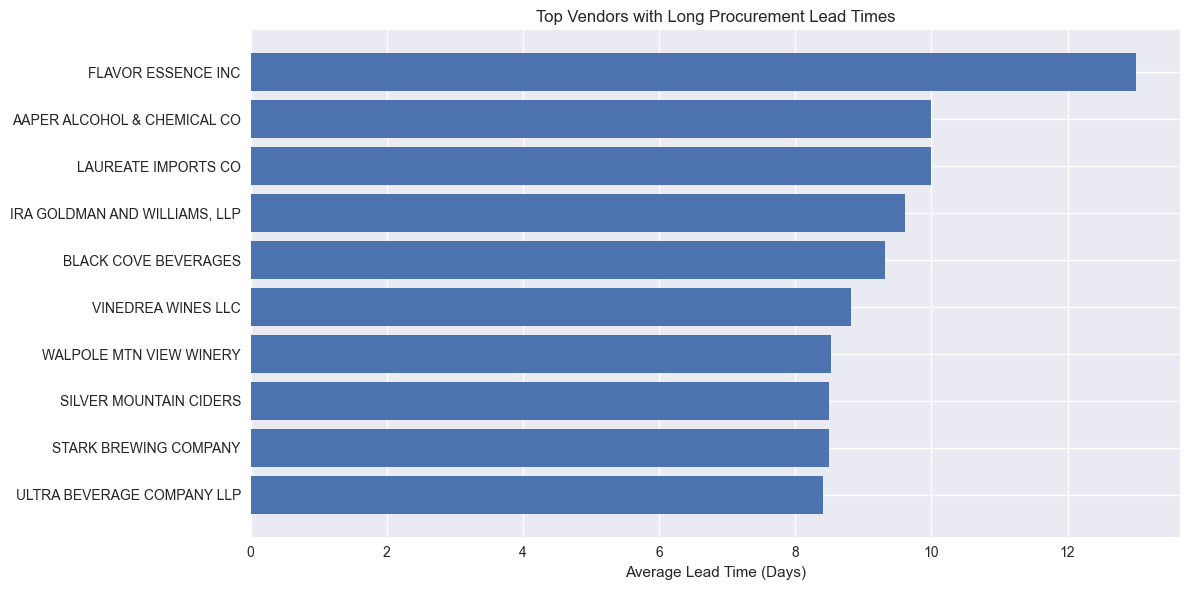

In [81]:
# VISUAL — VENDORS CAUSING PROCUREMENT DELAYS
top_vendors = vendor_lead_time.head(10)

plt.figure(figsize=(12,6))
plt.barh(top_vendors['VendorName'], top_vendors['Avg_Lead_Time'])
plt.xlabel("Average Lead Time (Days)")
plt.title("Top Vendors with Long Procurement Lead Times")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../visuals/16_Top_Vendors_with_Long_Procurement_Lead_Times.png", dpi=300, bbox_inches='tight')
plt.show()

In [82]:
# INVOICE PAYMENT DELAY ANALYSIS
vendor_payment_delay = (
    invoice
    .groupby('VendorName')
    .agg(
        Avg_Payment_Delay=('Invoice_to_Pay_Days', 'mean'),
        Total_Invoices=('InvoiceDate', 'count')
    )
    .reset_index()
    .sort_values('Avg_Payment_Delay', ascending=False)
)

vendor_payment_delay.head(10)

,VendorName,Avg_Payment_Delay,Total_Invoices
0,AAPER ALCOHOL & CHEMICAL CO,43.000000,1
56,LAUREATE IMPORTS CO,41.000000,1
115,UNCORKED,39.714286,7
42,GILMANTON WINERY & VINEYARD,39.500000,8
116,VINEDREA WINES LLC,38.800000,20
38,FLAVOR ESSENCE INC,38.000000,1
2,ALISA CARR BEVERAGES,37.789474,19
6,APPOLO VINEYARDS LLC,37.384615,13
82,R.P.IMPORTS INC,37.187500,16
63,MARTIGNETTI COMPANIES,37.146341,82


In [83]:
# Merge Beginning & Ending Inventory
inventory_movement = beg_inv.merge(
    end_inv,
    on=['InventoryId', 'Store', 'Brand', 'Description', 'Size_ML'],
    suffixes=('_Beg', '_End'),
    how='outer'
).fillna(0)

In [84]:
# Stock Change
inventory_movement['Stock_Change'] = (
    inventory_movement['onHand_End'] -
    inventory_movement['onHand_Beg']
)

In [85]:
# DEAD STOCK IDENTIFICATION (NO SALES)
sales_summary = (
    sales
    .groupby('InventoryId')
    .agg(Total_Sales=('SalesQuantity', 'sum'))
    .reset_index()
)

In [86]:
dead_stock = inventory_movement.merge(
    sales_summary, on='InventoryId', how='left'
)

dead_stock['Total_Sales'] = dead_stock['Total_Sales'].fillna(0)

dead_stock_items = dead_stock[
    (dead_stock['Total_Sales'] == 0) &
    (dead_stock['onHand_End'] > 0)
]

dead_stock_items.head(10)

,InventoryId,Store,City_Beg,Brand,Description,Size_ML,onHand_Beg,Price_Beg,startDate,Beg_Inventory_Value,City_End,onHand_End,Price_End,endDate,End_Inventory_Value,Stock_Change,Total_Sales
2,10_HORNSEY_1003,10,0,1003,Crown Royal VAP Glass+Coastr,750.0,0.0,0.00,0,0.00,HORNSEY,73.0,22.99,2016-12-31 00:00:00,1678.27,73.0,0.0
11,10_HORNSEY_10164,10,HORNSEY,10164,Andre Bourgogne Pnt Nr RSV,750.0,13.0,15.99,2016-01-01 00:00:00,207.87,HORNSEY,19.0,15.99,2016-12-31 00:00:00,303.81,6.0,0.0
12,10_HORNSEY_1019,10,HORNSEY,1019,Drambuie Glass Pack,750.0,0.0,26.99,2016-01-01 00:00:00,0.00,HORNSEY,11.0,26.99,2016-12-31 00:00:00,296.89,11.0,0.0
15,10_HORNSEY_10227,10,HORNSEY,10227,Due Torri Pnt Nr del Venezie,750.0,8.0,9.99,2016-01-01 00:00:00,79.92,HORNSEY,7.0,9.99,2016-12-31 00:00:00,69.93,-1.0,0.0
24,10_HORNSEY_1028,10,0,1028,Amaretto di Amore VAP,750.0,0.0,0.00,0,0.00,HORNSEY,9.0,9.99,2016-12-31 00:00:00,89.91,9.0,0.0
32,10_HORNSEY_1036,10,0,1036,Jameson Trilogy Pack,600.0,0.0,0.00,0,0.00,HORNSEY,1.0,39.99,2016-12-31 00:00:00,39.99,1.0,0.0
35,10_HORNSEY_10380,10,0,10380,Santa Cristina Pnt Grigio,750.0,0.0,0.00,0,0.00,HORNSEY,10.0,10.99,2016-12-31 00:00:00,109.90,10.0,0.0
37,10_HORNSEY_10414,10,0,10414,Le Cirque Rose,750.0,0.0,0.00,0,0.00,HORNSEY,4.0,13.99,2016-12-31 00:00:00,55.96,4.0,0.0
38,10_HORNSEY_10415,10,0,10415,Le Pive Rose Gris,750.0,0.0,0.00,0,0.00,HORNSEY,8.0,14.99,2016-12-31 00:00:00,119.92,8.0,0.0
64,10_HORNSEY_10642,10,0,10642,Marques de Murrieta RSV Rioj,750.0,0.0,0.00,0,0.00,HORNSEY,10.0,24.99,2016-12-31 00:00:00,249.90,10.0,0.0


In [87]:
# OVERSTOCK VS FAST-MOVING PRODUCTS
product_velocity = (
    sales
    .groupby('Description')
    .agg(
        Sales_Units=('SalesQuantity', 'sum'),
        Sales_Revenue=('SalesDollars', 'sum')
    )
    .reset_index()
)

In [88]:
inventory_levels = (
    end_inv
    .groupby('Description')
    .agg(Ending_Inventory=('onHand', 'sum'))
    .reset_index()
)

In [89]:
velocity_vs_inventory = product_velocity.merge(
    inventory_levels, on='Description', how='left'
)

In [90]:
# IDENTIFY PROCESS ISSUES
velocity_vs_inventory['Inventory_to_Sales_Ratio'] = (
    velocity_vs_inventory['Ending_Inventory'] /
    velocity_vs_inventory['Sales_Units']
)

In [91]:
problem_items = velocity_vs_inventory[
    velocity_vs_inventory['Inventory_to_Sales_Ratio'] > 3
].sort_values('Inventory_to_Sales_Ratio', ascending=False)

problem_items.head(10)

,Description,Sales_Units,Sales_Revenue,Ending_Inventory,Inventory_to_Sales_Ratio
3653,Kilbeggan Irish Whiskey,1,22.99,2699.0,2699.0
4125,Marchesi di Barolo Monferrat,1,12.99,573.0,573.0
1188,Carpineto Valcolomba Verment,1,11.99,402.0,402.0
3116,Hell-Cat Maggie Irish Whisky,1,19.99,400.0,400.0
3234,Horseshoes & Handgrenades Re,1,17.99,323.0,323.0
5682,Sensi Dalcampo Chianti Rsva,1,13.99,303.0,303.0
5884,Sokol Blosser Pnt Nr,1,37.99,292.0,292.0
5651,Sean Minor 4B Paso Cab Svgn,1,12.99,283.0,283.0
67,Aberfeldy Single Cask,1,249.99,268.0,268.0
3210,Home Ranch Sbragia Chard,6,149.94,1563.0,260.5


In [92]:
# SUMMARY KPIs FOR MANAGEMENT
kpi_summary = {
    "Avg Procurement Lead Time (Days)": round(purchase['PO_to_Receive_Days'].mean(), 2),
    "Avg Invoice Payment Delay (Days)": round(invoice['Invoice_to_Pay_Days'].mean(), 2),
    "Dead Stock Items Count": dead_stock_items.shape[0],
    "Overstocked Products Count": problem_items.shape[0]
}

pd.DataFrame(kpi_summary.items(), columns=["KPI", "Value"])

,KPI,Value
0,Avg Procurement Lead Time (Days),7.62
1,Avg Invoice Payment Delay (Days),35.47
2,Dead Stock Items Count,73184.00
3,Overstocked Products Count,2726.00


In [92]:
vendor_lead_time.describe()

,Avg_Lead_Time,Max_Lead_Time,Orders
count,128.000000,128.000000,128.000000
mean,7.751556,12.953125,18534.929688
std,0.774727,1.424529,42321.515145
min,5.000000,5.000000,1.000000
25%,7.470994,12.000000,138.500000
50%,7.667910,13.000000,919.000000
75%,7.952774,14.000000,12433.500000
max,13.000000,14.000000,243326.000000


In [93]:
vendor_payment_delay.describe()

,Avg_Payment_Delay,Total_Invoices
count,128.000000,128.000000
mean,35.494221,43.304688
std,1.748475,18.746363
min,28.666667,1.000000
25%,34.827273,35.000000
50%,35.536364,54.000000
75%,36.209559,55.000000
max,43.000000,82.000000


In [94]:
dead_stock_items.describe()

,Store,Brand,Size_ML,onHand_Beg,Price_Beg,Beg_Inventory_Value,onHand_End,Price_End,End_Inventory_Value,Stock_Change,Total_Sales
count,73184.000000,73184.000000,73184.000000,73184.000000,73184.000000,73184.000000,73184.000000,73184.00000,73184.000000,73184.000000,73184.0
mean,46.355255,15421.836713,829.306608,4.096592,15.787231,120.687967,16.442515,34.80628,317.943009,12.345923,0.0
std,23.027485,12967.288992,1847.184947,8.834171,101.762548,421.746254,32.154217,135.10057,532.118324,33.135266,0.0
min,1.000000,58.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.49000,0.980000,-265.000000,0.0
25%,29.000000,3733.000000,750.000000,0.000000,0.000000,0.000000,6.000000,11.99000,101.940000,1.000000,0.0
50%,49.000000,12123.000000,750.000000,0.000000,0.000000,0.000000,10.000000,16.99000,179.970000,6.000000,0.0
75%,67.000000,25210.000000,750.000000,6.000000,14.990000,125.300000,16.000000,31.99000,339.950000,13.000000,0.0
max,81.000000,90631.000000,484532.480000,306.000000,13999.900000,21599.730000,3676.000000,13999.90000,22019.240000,3676.000000,0.0


In [95]:
problem_items.describe()

,Sales_Units,Sales_Revenue,Ending_Inventory,Inventory_to_Sales_Ratio
count,2726.000000,2726.000000,2726.000000,2726.000000
mean,100.170580,2103.420946,506.955979,13.647959
std,230.931675,5255.493122,1024.420464,58.261338
min,1.000000,3.290000,4.000000,3.008600
25%,5.000000,146.472500,59.000000,4.125000
50%,28.000000,627.635000,197.500000,6.000000
75%,85.000000,1954.690000,456.000000,10.856982
max,4206.000000,138452.690000,13987.000000,2699.000000


### Process Improvement Analysis — Insights

### Identified Issues:

 - Over-ordering of low-value SKUs
 - Manual or inconsistent reorder decisions
 - Lack of SKU prioritization
 - Vendor performance not actively monitored

### Opportunities:

 - ABC-based reorder policies
 - Automated reorder triggers
 - Vendor scorecards
 - Demand-driven replenishment

## 🧠 Inventory Management Strategy

### 🎯 Strategic Pillars 

### 1️⃣ SKU Segmentation Strategy
 - A items → Tight control, frequent review, low safety stock
 - B items → Moderate review cycle
 - C items → Bulk ordering or discontinuation evaluation

### 2️⃣ Demand-Driven Replenishment
 - Forecast-based EOQ ordering
 - Dynamic reorder points using lead time variability

### 3️⃣ Vendor Optimization
 - Prefer vendors with low lead time variance
 - Renegotiate terms with inconsistent suppliers

### 4️⃣ Working Capital Optimization
 - Reduce excess inventory in C-category
 - Improve inventory turnover ratio

## ✅ Final Recommendations

- ✔ Implement ABC-based inventory control
- ✔ Use EOQ + Reorder Point instead of fixed ordering
- ✔ Reduce C-category SKU count
- ✔ Monitor vendor lead time performance monthly
- ✔ Automate reorder triggers for A-category items
- ✔ Review slow-moving SKUs quarterly

## 🏁 Conclusion

This inventory analysis provided actionable insights into demand behavior, inventory efficiency, cost structure, and procurement performance. By adopting a data-driven inventory strategy, the company can:

 - Reduce stockouts
 - Minimize excess inventory
 - Lower carrying costs
 - Improve working capital
 - Enhance customer satisfaction
   
### 📌 Outcome:
A scalable, sustainable, and efficient inventory management system aligned with business growth.